Install all the dependencies

In [2]:
install.packages("twitteR",repos="http://cran.us.r-project.org")
install.packages("ggmap",repos="http://cran.us.r-project.org")
install.packages("hash",repos="http://cran.us.r-project.org")
library(twitteR)
library(ggmap)
library(ggplot2)
library(hash)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: ggplot2
hash-2.2.6 provided by Decision Patterns



In [3]:
setup_twitter_oauth("","","","")

[1] "Using direct authentication"


Execute the cell below to download tweets related to a topic and convert them into data frames

In [4]:
#Downlaod tweets
 topic <- '#nfl'
 tweets <- searchTwitter(topic, n=1000)
#Covert into data frames
 tweets_df <- twListToDF(tweets)


Group screen names becuase location is to be determined via screen name

In [19]:
# UserName to Count map
# I asked a question related to the code below @ https://stackoverflow.com/questions/42238057/has-key-method-in-hash-package-of-r-not-storing-string-key-properly
 user_count_map <- hash()
 i=1
 num_tweets <- nrow(tweets_df)
 while(i<= num_tweets){
 screen_name <- tweets_df[i,]$screenName
 if(has.key(screen_name,user_count_map)==TRUE){
    count <- user_count_map[[screen_name]]
    user_count_map[[screen_name]] <- (count +1)
} else {
   user_count_map[[screen_name]] <- 1
}
i = i+1
}

Get All Locations and get location to count mapping. This way the number of unique locations would reduce and hence lesser number of API calls would be required 

In [21]:
# Get All Locations and get location to count mapping
 all_users <- lookupUsers(keys(user_count_map))
 location_count_map <- hash()
 for(u in all_users){
location <- u$location
screenName <- u$screenName
 if(!is.null(location) && location!=""){
if((has.key(location,location_count_map))==TRUE){
    location_count_map[[location]] <- location_count_map[[location]] + user_count_map[[screenName]]
} else {
 location_count_map[[location]] <- user_count_map[[screenName]]
} 
}
i=i+1
}

Get all the geocodes to count mapping. Only take those geocodes which falls in US. To check if the location is in US, search for the reverse geocode check if the address ends with "USA". Again 

In [22]:
# Get all the geocodes to count mapping. Only take those geocodes which falls in US
# "options" to reduce the logs. Credit http://stackoverflow.com/questions/16194212/how-to-suppress-warnings-globally-in-an-r-script
options(warn=-1)
reg <- "USA$"
allLocs <- keys(location_count_map)
lat_lon_count_map <- hash()
for(loc in allLocs){
    code <- geocode(loc)
    if(!is.na(code$lon)){
        rev_loc <- c(code$lon,code$lat)
        rev <- revgeocode(rev_loc)
        if(any(grep(reg,rev))){
            str <- c(code$lon,",",code$lat)
            str_2 <- paste(str,collapse='')
            if(has.key(str_2,lat_lon_count_map)){
                lat_lon_count_map[[str_2]] <- lat_lon_count_map[[str_2]] + location_count_map[[loc]]
            } else {
                lat_lon_count_map[[str_2]] <- location_count_map[[loc]]
            }
            print("yes")
        } else {
            print("no")
            }
    } else {
        print("bad")
    }
}

locationKeys = keys(lat_lon_count_map)
#values <- values(lat_lon_count_map)
#values
write("",file=topic,append=FALSE,sep='')
for(location in locationKeys){
    count <- lat_lon_count_map[[location]]
    write(location,file=topic,append=TRUE,sep='\n')
    write(count,file=topic,append=TRUE,sep='\n')
}



Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20NY%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127837,-74.0059413&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Rhode%20Island&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.5800945,-71.4774291&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address='Merica&sensor=false


[1] "bad"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=203&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.2902114,-71.0950073&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=32%20Cities,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=44.9033307,-93.3086279&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=36.120981,-115.169776&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.1218631,-115.1696492&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=45%20&%20Lex%20New%20York,%20New%20York&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.9756664,-95.8925412&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=908.%20NJ.&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=47.2645502,-122.4626928&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=A%20Coru%C3%B1a%20/%20Madrid%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.4553315,-3.7003253&sensor=false


[1] "no"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Albany,%20NY%20former%20Buffalo,%20NY&sensor=false


[1] "bad"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=All%20NFL%20cities&sensor=false


[1] "bad"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arizona&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.0489281,-111.0937311&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arkansas,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=35.20105,-91.8318334&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arlington,%20TX&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.735687,-97.1080656&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Asuncion,%20Paraguay&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=-25.2637399,-57.575926&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Atlanta,%20GA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.7489954,-84.3879824&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Atlanta,%20Ga.&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.7489954,-84.3879824&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Austin,%20Texas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.267153,-97.7430608&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Austin,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.267153,-97.7430608&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Baltimore,%20MD&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.2903848,-76.6121893&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Belem%20do%20Par%C3%A1%20!&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=-1.4557794,-48.4901968&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Birmingham,%20Alabama&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.5206608,-86.80249&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston,%20MA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.3600825,-71.0588801&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brenham,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.1668828,-96.3977442&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bringing%20Football%20to%20Germany&sensor=false


[1] "bad"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bronx,%20NY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.8447819,-73.8648268&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brooklyn,%20New%20York&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.6781784,-73.9441579&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Buffalo&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.8864468,-78.8783689&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Burbank,%20California&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.1808392,-118.3089661&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cali%20to%20Zona&sensor=false


[1] "bad"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.778261,-119.4179324&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cancun,%20Q.Roo&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=21.161908,-86.8515279&sensor=false


[1] "no"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Canton,%20OH&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7989473,-81.378447&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Carol%20City,%20Miami%20Gardens,%20FL%2033056,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=25.940556,-80.2455912&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Central,%20PA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.2967482,-76.3729962&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Charlotte,%20NC&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=35.2270869,-80.8431267&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chester&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=53.193392,-2.893075&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.8781136,-87.6297982&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago,%20IL&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.8781136,-87.6297982&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chile&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=-35.675147,-71.542969&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cincinnati%20Bengals&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.1050352,-84.5484209&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cincinnati,%20OH&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.1031182,-84.5120196&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ciudadano%20del%20Mundo&sensor=false


[1] "bad"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=CLEVELAND&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.49932,-81.6943605&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cleveland,%20OH&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.49932,-81.6943605&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Colorado,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.5500507,-105.7820674&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Coral%20Springs,%20FL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=26.271192,-80.2706044&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.7766642,-96.7969879&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.7766642,-96.7969879&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,Tx&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.7766642,-96.7969879&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Denver&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.7392358,-104.990251&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Denver,%20CO&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.7392358,-104.990251&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Detroit,%20MI&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.331427,-83.0457538&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=DFW%20Metroplex&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.7517028,-97.0675521&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=DMV%20--%20PG&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.6906051,-90.3880236&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=DMV(Northern%20Virginia)&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.642641,-82.569858&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Druid%20Hills,%20GA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.7803832,-84.3360359&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dubai&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=25.2048493,55.2707828&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=duval%20county%20VontaLand&sensor=false


[1] "bad"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=East%20Baltimore%20Midway,%20Baltimore&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.31471,-76.6037222&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=El%20Salvador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=13.794185,-88.89653&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=England&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=52.3555177,-1.1743197&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Estados%20Unidos&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.09024,-95.712891&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Eugene,%20Oregon&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=44.0520691,-123.0867536&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Everywhere%20there's%20football&sensor=false


[1] "bad"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Follow%20What%20Moves%20You&sensor=false


[1] "bad"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fort%20Calhoun,%20NE&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.4558282,-96.0264024&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fort%20Collins,%20CO&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.5852602,-105.084423&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gator%20Country%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=29.9291067,-94.2745114&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Georgia,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.1656221,-82.9000751&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Global&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.1140497,-83.9811014&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Green%20Bay,%20WI&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=44.519159,-88.019826&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hall%20Of%20Fame&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.6999368,-74.9232137&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=29.7604267,-95.3698028&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,%20Tx&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=29.7604267,-95.3698028&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,%20TX&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=29.7604267,-95.3698028&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=In%20da%20studio...%20Rollin%20a%20Dutch&sensor=false


[1] "bad"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Indiana&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.2671941,-86.1349019&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Indianapolis,%20IN&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.768403,-86.158068&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Inglewood,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.9616801,-118.3531311&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=International%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.9277072,-94.5672342&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jacksonville,%20FL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.3321838,-81.655651&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kansas%20City,%20MO&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.0997265,-94.5785667&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=KCMO%20%E2%9E%A1%EF%B8%8F%20The%20'Ville%20%E2%9E%A1%EF%B8%8F%20STJOMO&sensor=false


[1] "bad"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=LA%20BABY!&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.033879,-117.935274&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lafayette,%20LA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.2240897,-92.0198427&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Land%20of%2010,000%20Lakes,USA%20%20%20%20%20&sensor=false


[1] "bad"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Las%20Vegas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.1699412,-115.1398296&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Leeds,%20UK&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=53.8007554,-1.5490774&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lincoln,%20UK&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=53.230688,-0.540579&sensor=false


[1] "no"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London,%20England&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=51.5073509,-0.1277583&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Longview%20TX.%20.Dallas.%20.&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.8308544,-96.7750993&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.0522342,-118.2436849&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles%20via%20South%20Florida&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.0485869,-118.264445&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.0522342,-118.2436849&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=lost%20in%20the%20hip%20hop&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=-34.6144168,-58.3708011&sensor=false


[1] "no"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lubbock,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.5778631,-101.8551665&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lynbrook,%20NY%20%E2%9C%88%20Syracuse,%20NY&sensor=false


[1] "bad"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Made%20in%20Venezuela%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=51.5032186,-0.3070078&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Madison,%20WI&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.0730517,-89.4012302&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Marietta,%20GA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.952602,-84.5499327&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Maryland,%20D.C.%20Virginia.&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.9071923,-77.0368707&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Maryland,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.0457549,-76.6412712&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Marysville,%20OH&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.2364486,-83.3671432&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Metairie,%20LA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=29.9840922,-90.1528519&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Metropolitano%20y%20Campod%C3%B3nico&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=44.3369376,9.2955381&sensor=false


[1] "no"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Miami,%20FL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=25.7616798,-80.1917902&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Minneapolis&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=44.977753,-93.2650108&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Minneapolis,%20MN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=44.977753,-93.2650108&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Minnesota&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=46.729553,-94.6858998&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Missing%20/%20AntiTrafficking%20%20&sensor=false


[1] "bad"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=MN,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=46.729553,-94.6858998&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Monterrey,%20Nuevo%20Le%C3%B3n&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=25.6866142,-100.3161126&sensor=false


[1] "no"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Montreal&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=45.5016889,-73.567256&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mount%20Laurel,%20NJ&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.934002,-74.8909988&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=My%20Own%20World&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.912639,-111.892748&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nashville,%20TN&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.1626638,-86.7816016&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20England&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.9653889,-70.8226541&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Hampshire&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.1938516,-71.5723953&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Jersey%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.0583238,-74.4056612&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Jersey,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.0583238,-74.4056612&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20mexico&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=34.5199402,-105.8700901&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Orleans&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=29.9510658,-90.0715323&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Orleans,%20LA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=29.9510658,-90.0715323&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127837,-74.0059413&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York%20City&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127837,-74.0059413&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127837,-74.0059413&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY,%20United%20States&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127837,-74.0059413&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127837,-74.0059413&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NFL%20&%20Worldwide&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7577029,-73.9723758&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NJ%20FAAB&sensor=false


[1] "bad"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NORTH%20AMERICA/EUROPE&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=51.4362036,5.9792472&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Northeast&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=65.4713712,-17.0280279&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NYC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127837,-74.0059413&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oakland,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.8043637,-122.2711137&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oakland,%20CA%20#systemdynamics&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.8043637,-122.2711137&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=PAC%20NW&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.5712484,-112.1874521&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Philadelphia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.9525839,-75.1652215&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Philadelphia,%20PA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.9525839,-75.1652215&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Phoenix,%20AZ&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=33.4483771,-112.0740373&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pittsburgh,%20PA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.4406248,-79.9958864&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pompano%20%20Beach%20&%20Boulder%20%20Co&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=26.2378597,-80.1247667&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Queens,%20NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7282239,-73.7948516&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Richmond%20VA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.5407246,-77.4360481&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Roma&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.9027835,12.4963655&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rural%20Hall,%20NC&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.2404158,-80.2933838&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Salem,%20NH&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.7885553,-71.2008912&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Diego&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=32.715738,-117.1610838&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Francisco&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.7749295,-122.4194155&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Francisco,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.7749295,-122.4194155&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sandston,%20VA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.5234001,-77.3158452&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sarasota,%20Florida&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=27.3364347,-82.5306527&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Seattle&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=47.6062095,-122.3320708&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Seattle,%20WA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=47.6062095,-122.3320708&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=South%20Central,%20Pennsylvania&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.5946848,-78.711385&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Southington%20CT%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.5964869,-72.8776013&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=St.%20Louis,%20MO&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.6270025,-90.1994042&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Station%20X&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.7764667,-122.3922765&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Str8%20Independent%20Grind&sensor=false


[1] "bad"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Street%20of%20Dreams&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=39.4607889,-78.0006131&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Swap%20Shop&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=26.1372742,-80.1912273&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tamaulipas-Texas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=24.26694,-98.8362755&sensor=false


[1] "no"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tampa,%20FL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=27.950575,-82.4571776&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tennessee&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=35.5174913,-86.5804473&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=31.9685988,-99.9018131&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Beach&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=50.8253914,-0.1847943&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Garden%20State%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.0583238,-74.4056612&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Most%20Shared%20%20Media!&sensor=false


[1] "bad"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto,%20Ontario&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.653226,-79.3831843&sensor=false


[1] "no"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=tozzcast.com%20&sensor=false


[1] "bad"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Trine%20University&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.6323886,-85.0078726&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Twitter%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.7767964,-122.4166041&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=TX&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=31.9685988,-99.9018131&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=UK&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=55.378051,-3.435973&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.09024,-95.712891&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=US&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.09024,-95.712891&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=usa&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.09024,-95.712891&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=37.09024,-95.712891&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%C3%9CT:%2042.480141,-83.284343&sensor=false


[1] "bad"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=VA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.902916,12.453389&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Valhalla&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.0748188,-73.7751326&sensor=false


[1] "yes"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Venezuela&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=6.42375,-66.58973&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=47.7510741,-120.7401386&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20D.C.&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.9071923,-77.0368707&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=38.9071923,-77.0368707&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Winnipeg,%20Manitoba&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=49.895136,-97.1383744&sensor=false


[1] "no"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Winston%20Salem,%20NC&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=36.0998596,-80.244216&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=world%20wide%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.8169837,-79.532157&sensor=false


[1] "no"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=World%20Wide%20Web&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.3618641,-71.0905626&sensor=false


[1] "yes"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Worldwide&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=43.8169837,-79.532157&sensor=false


[1] "no"


.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Zimmer%20Era%202016&sensor=false


[1] "bad"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%E3%82%82%E3%81%86%E3%81%99%E3%81%90%E6%9D%A5%E3%82%8B%E3%82%A6%E3%82%A7%E3%83%96%E3%82%B5%E3%82%A4%E3%83%88&sensor=false


[1] "bad"


-101.8551665,33.5778631  -104.990251,39.7392358  -105.084423,40.5852602 
                      1                       7                       1 
-105.7820674,39.5500507 -105.8700901,34.5199402 -111.0937311,34.0489281 
                      1                       1                      10 
  -111.892748,40.912639 -112.0740373,33.4483771 -112.1874521,33.5712484 
                      1                       7                       1 
-115.1398296,36.1699412 -115.1696492,36.1218631  -117.1610838,32.715738 
                      2                       1                      25 
  -117.935274,34.033879 -118.2436849,34.0522342  -118.264445,34.0485869 
                      4                       5                       1 
-118.3089661,34.1808392 -118.3531311,33.9616801  -119.4179324,36.778261 
                     14                       1                       6 
-120.7401386,47.7510741 -122.2711137,37.8043637 -122.3320708,47.6062095 
                     17                       7                      20 
-122.3922765,37.7764667 -122.4166041,37.7767964 -122.4194155,37.7749295 
                      2                       1                      20 
-122.4626928,47.2645502 -123.0867536,44.0520691  -70.8226541,43.9653889 
                      1                       1                       4 
 -71.0588801,42.3600825  -71.0905626,42.3618641  -71.0950073,42.2902114 
                      1                       1                       1 
 -71.2008912,42.7885553  -71.4774291,41.5800945  -71.5723953,43.1938516 
                      1                       1                       1 
 -72.8776013,41.5964869  -73.7751326,41.0748188  -73.7948516,40.7282239 
                      1                       1                       1 
 -73.8648268,40.8447819  -73.9441579,40.6781784  -73.9723758,40.7577029 
                      1                       1                       5 
 -74.0059413,40.7127837  -74.4056612,40.0583238   -74.8909988,39.934002 
                     33                       3                       1 
 -74.9232137,42.6999368  -75.1652215,39.9525839  -76.3729962,41.2967482 
                      2                      11                       1 
   -76.6037222,39.31471  -76.6121893,39.2903848  -76.6412712,39.0457549 
                      1                      34                       1 
 -77.0368707,38.9071923  -77.3158452,37.5234001  -77.4360481,37.5407246 
                      9                       1                       1 
 -78.0006131,39.4607889   -78.711385,40.5946848  -78.8783689,42.8864468 
                      1                       1                      10 
 -79.9958864,40.4406248  -80.1247667,26.2378597  -80.1912273,26.1372742 
                     33                       1                       1 
 -80.1917902,25.7616798   -80.244216,36.0998596   -80.2455912,25.940556 
                      5                       1                       1 
  -80.2706044,26.271192  -80.2933838,36.2404158  -80.8431267,35.2270869 
                      1                       1                       5 
  -81.378447,40.7989473   -81.655651,30.3321838    -81.6943605,41.49932 
                      2                      22                      37 
  -82.4571776,27.950575  -82.5306527,27.3364347    -82.569858,36.642641 
                      5                       8                       1 
 -82.9000751,32.1656221   -83.0457538,42.331427  -83.3671432,40.2364486 
                      1                       5                      10 
 -83.9811014,34.1140497  -84.3360359,33.7803832  -84.3879824,33.7489954 
                      4                       1                       9 
 -84.5120196,39.1031182  -84.5484209,39.1050352   -84.5499327,33.952602 
                     26                       5                       1 
 -85.0078726,41.6323886  -86.1349019,40.2671941    -86.158068,39.768403 
                      1                       7                       6 
 -86.5804473,35.5174913  -86.7816016,36.1626638    -86.802

If you already have a file in specific format, skip the above steps and read the file. 

**** Important ****
For grading, please use the file name as 'coord_values' ie replace topic with 'coord_values' (including the single quotes)

In [23]:
# Read Co-ordinates from file
coord_data <- read.table(topic)

To give more significance to locations from where more tweets were obtained, get the maximum count among all the locations and set the size and alpha of 

In [24]:
length <- nrow(coord_data)
# get max count
max <- as.numeric(0)
i=2
#as.numeric(as.character(coord_data[[1]][4]))
while(i<=length){
    count <- as.numeric(as.character(coord_data[[1]][i]))
    #print(count)
    if(count>max){
        max<-count
    }
    i=i+2
    }


[1] -104.990251,39.7392358
132 Levels: -101.8551665,33.5778631 ... 9

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=29.763284,-95.363271&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false


[1] 612


Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

$data
$data[[1]]
           x         y PANEL group
1 -123.44433  3.029554     1    -1
2  -67.19433  3.029554     1    -1
3 -123.44433 50.874516     1    -1
4  -67.19433 50.874516     1    -1

$data[[2]]
           x         y PANEL group
1 -123.44433  3.029554     1    -1
2  -67.19433  3.029554     1    -1
3 -123.44433 50.874516     1    -1
4  -67.19433 50.874516     1    -1

$data[[3]]
       xmin      xmax     ymin     ymax PANEL group colour  fill size linetype
1 -123.4443 -67.19433 3.029554 50.87452     1    -1     NA black  0.5        1
  alpha
1     0

$data[[4]]
          x        y PANEL group shape colour     size fill     alpha stroke
1 -102.4107 34.23314     1    -1    19  black 1.019608   NA 0.5098039    0.5

$data[[5]]
          x       y PANEL group shape colour     size fill    alpha stroke
1 -103.8986 33.5613     1    -1    19  black 1.003268   NA 0.501634    0.5

$data[[6]]
          x        y PANEL group shape colour     size fill    alpha stroke
1 -104.8214 38.8338

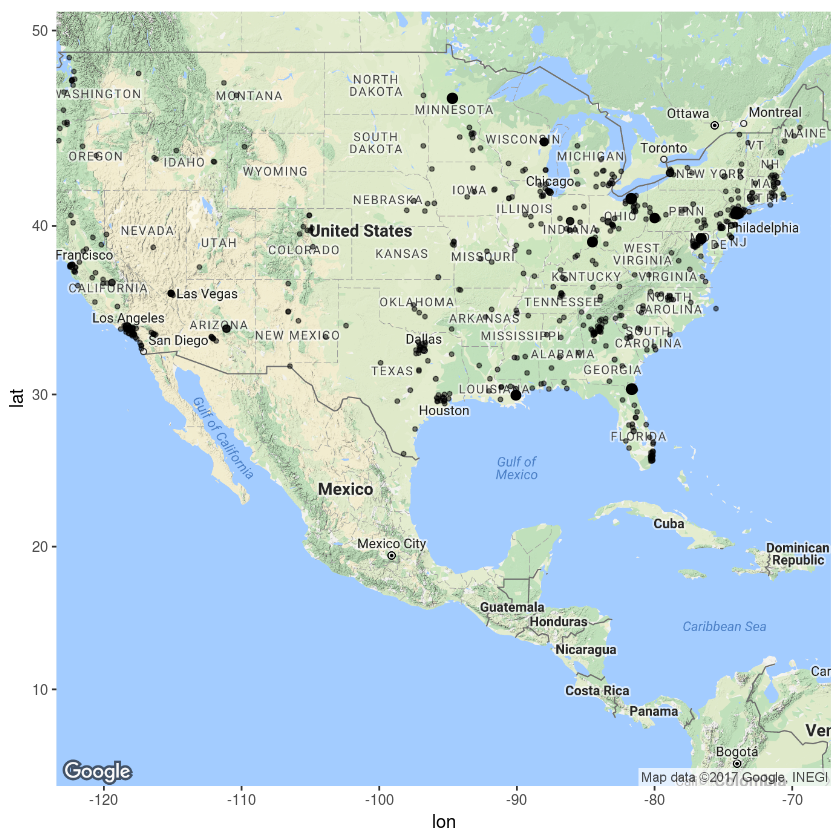

In [52]:
# Plot
i = 1
usMap <- get_map(zoom=4)
usMap <- ggmap(usMap)
print(max)
while(i<=length-1){
    coord_loc <- coord_data[[1]][i]
    count <- as.numeric(as.character(coord_data[[1]][i+1]))
    #print(count)
    a <- count/max
    if(a>.5){
        a=.5
    }
    s<- (count/max)*2
    inp <- as.character(coord_loc)
    inp <- strsplit(inp,',')
    gd <- data.frame(lat=c(as.numeric(inp[[1]][2])),lon=c(as.numeric(inp[[1]][1])))
    usMap <- usMap + geom_point(data=gd,aes(x=lon, y=lat),size=s+1,alpha=.5 + a) 
    i=i+2
    
}
ggplot_build(usMap)